In [1]:
import pandas as pd
import numpy as np
import os,sys
import ROOT as rt

Welcome to JupyROOT 6.26/02


In [38]:
save_ = True

In [2]:
data = pd.read_csv('Fig3_CutEfficiencies.txt', delimiter='\t',header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,X_SbBe70V,Y_SbBe70V,ErrorX_SbBe70V,ErrorY_SbBe70V,X_Sb70V,Y_Sb70V,ErrorX_Sb70V,ErrorY_Sb70V,X_YBe70V,Y_YBe70V,...,ErrorX_Y70V,ErrorY_Y70V,X_YBe25V,Y_YBe25V,ErrorX_YBe25V,ErrorY_YBe25V,X_Y25V,Y_Y25V,ErrorX_Y25V,ErrorY_Y25V
1,0.75,0.903197,0,0.00153676,0.75,0.929806,0,0.002418,1.5,0.894933,...,0,0.00941477,0.75,0.919898,0,0.00731003,1.75,0.922944,0,0.00919322
2,4.75,0.903147,0,0.0015369,4.75,0.9298,0,0.00241813,2.5,0.894966,...,0,0.00941481,1.75,0.919895,0,0.0073116,2.75,0.92297,0,0.00918854
3,8.75,0.903048,0,0.00153719,8.75,0.929788,0,0.00241838,3.5,0.895031,...,0,0.00941491,2.75,0.919888,0,0.0073147,3.75,0.923009,0,0.00917911
4,12.75,0.902902,0,0.00153762,12.75,0.929771,0,0.00241874,4.5,0.895128,...,0,0.00941506,3.75,0.919877,0,0.00731933,4.75,0.92306,0,0.00916504


In [3]:
data.columns = [i for i in data.iloc[0]]
title = [i for i in data.iloc[0]]
data = data.drop([0])
data.head()

,X_SbBe70V,Y_SbBe70V,ErrorX_SbBe70V,ErrorY_SbBe70V,X_Sb70V,Y_Sb70V,ErrorX_Sb70V,ErrorY_Sb70V,X_YBe70V,Y_YBe70V,...,ErrorX_Y70V,ErrorY_Y70V,X_YBe25V,Y_YBe25V,ErrorX_YBe25V,ErrorY_YBe25V,X_Y25V,Y_Y25V,ErrorX_Y25V,ErrorY_Y25V
1,0.75,0.903197,0,0.00153676,0.75,0.929806,0,0.002418,1.5,0.894933,...,0,0.00941477,0.75,0.919898,0,0.00731003,1.75,0.922944,0,0.00919322
2,4.75,0.903147,0,0.0015369,4.75,0.9298,0,0.00241813,2.5,0.894966,...,0,0.00941481,1.75,0.919895,0,0.0073116,2.75,0.92297,0,0.00918854
3,8.75,0.903048,0,0.00153719,8.75,0.929788,0,0.00241838,3.5,0.895031,...,0,0.00941491,2.75,0.919888,0,0.0073147,3.75,0.923009,0,0.00917911
4,12.75,0.902902,0,0.00153762,12.75,0.929771,0,0.00241874,4.5,0.895128,...,0,0.00941506,3.75,0.919877,0,0.00731933,4.75,0.92306,0,0.00916504
5,16.75,0.902708,0,0.00153818,16.75,0.929748,0,0.00241921,5.5,0.895255,...,0,0.00941526,4.75,0.919864,0,0.0073254,5.75,0.923122,0,0.00914669


In [17]:
#title 
# title = np.array([temp.split('_')[-1] for temp in title])
# title = np.unique(title)
title = ['SbBe70V','YBe70V','YBe25V','Sb70V','Y70V','Y25V']

In [18]:
gr_a = []

for i in title:
    if(not('Be' in i)):
        continue
    non_null = data['X_%s'%(i)].notna()
    x = pd.to_numeric(data['X_%s'%(i)][non_null], errors='coerce')
    y = pd.to_numeric(data['Y_%s'%(i)][non_null], errors='coerce')
    ex = pd.to_numeric(data['ErrorX_%s'%(i)][non_null], errors='coerce')
    ey = pd.to_numeric(data['ErrorY_%s'%(i)][non_null], errors='coerce')
    #pd.to_numeric(s, errors='coerce')
    temp_gr = rt.TGraphErrors()
    temp_gr.SetName(i)
    
    for j in range(len(x)):
        temp_gr.SetPoint(j,(x.iloc[j]),y.iloc[j])
        temp_gr.SetPointError(j,ex.iloc[j],ey.iloc[j])
    gr_a.append(temp_gr)


    del temp_gr
    
for graph in gr_a:
    print ('Graph for %s'%(graph.GetName()))

Graph for SbBe70V
Graph for YBe70V
Graph for YBe25V


In [19]:
line_color = [rt.kBlack, rt.kBlack, rt.kBlack,rt.kBlack]
fill_color = [rt.kRed, rt.kGreen, rt.kBlue, rt.kMagenta]

0 : Graph for SbBe70V
1 : Graph for YBe70V
2 : Graph for YBe25V
Plots saved!!


Info in <TCanvas::Print>: png file ./plots/png/Fig_3a.png has been created
Info in <TCanvas::Print>: pdf file ./plots/pdf/Fig_3a.pdf has been created


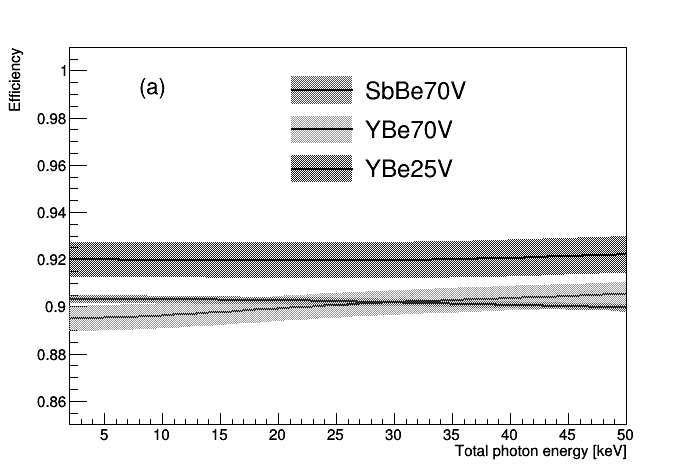

In [39]:
c = rt.TCanvas()
count = 0
legend = rt.TLegend(0.4,0.85,0.9,0.6)
#legend.SetNColumns(3)
legend.SetBorderSize(0)

for i,graph in enumerate(gr_a):
    print ('%d : Graph for %s'%(i,graph.GetName()))
    graph.SetLineColor(line_color[i])
    graph.SetLineWidth(2)
    graph.SetFillColor(fill_color[i])
    graph.SetFillStyle(3001)
    graph.GetYaxis().SetRangeUser(0.85,1.01)
    graph.GetXaxis().SetLimits(2,50.0)
    
#     if(not count):
#         #graph.Draw("AL3")
        
#         #graph.Draw("AL3")
#         count += 1
#     else:
#         graph.Draw("L3 SAME")
        
    l1 = legend.AddEntry(graph,graph.GetName(),"lf")
    l1.SetTextColor(graph.GetMarkerColor())
    
    graph.GetXaxis().SetTitle('Total photon energy [keV]')
    graph.GetYaxis().SetTitle('Efficiency')
    

gr_a[2].Draw('AL3')
gr_a[1].Draw('L3 SAME')
gr_a[0].Draw('L3 SAME')
legend.Draw()
c.Draw()

textOnTop = rt.TLatex()
textOnTop.SetTextSize(0.05);
textOnTop.DrawLatexNDC(0.2,0.8,"#bf{(a)}");
if(save_):
    c.SaveAs('./plots/png/Fig_3a.png')
    c.SaveAs('./plots/pdf/Fig_3a.pdf')
    print ('Plots saved!!')

In [32]:
gr_b = []

for i in title:
    if(('Be' in i)):
        continue
    non_null = data['X_%s'%(i)].notna()
    x = pd.to_numeric(data['X_%s'%(i)][non_null], errors='coerce')
    y = pd.to_numeric(data['Y_%s'%(i)][non_null], errors='coerce')
    ex = pd.to_numeric(data['ErrorX_%s'%(i)][non_null], errors='coerce')
    ey = pd.to_numeric(data['ErrorY_%s'%(i)][non_null], errors='coerce')
    #pd.to_numeric(s, errors='coerce')
    temp_gr = rt.TGraphErrors()
    temp_gr.SetName(i)
    
    for j in range(len(x)):
        temp_gr.SetPoint(j,(x.iloc[j]),y.iloc[j])
        temp_gr.SetPointError(j,ex.iloc[j],ey.iloc[j])
    gr_b.append(temp_gr)


    del temp_gr
    
for graph in gr_b:
    print ('Graph for %s'%(graph.GetName()))

Graph for Sb70V
Graph for Y70V
Graph for Y25V


0 : Graph for Sb70V
1 : Graph for Y70V
2 : Graph for Y25V
Plots saved!!


Info in <TCanvas::Print>: png file ./plots/png/Fig_3b.png has been created
Info in <TCanvas::Print>: pdf file ./plots/pdf/Fig_3b.pdf has been created


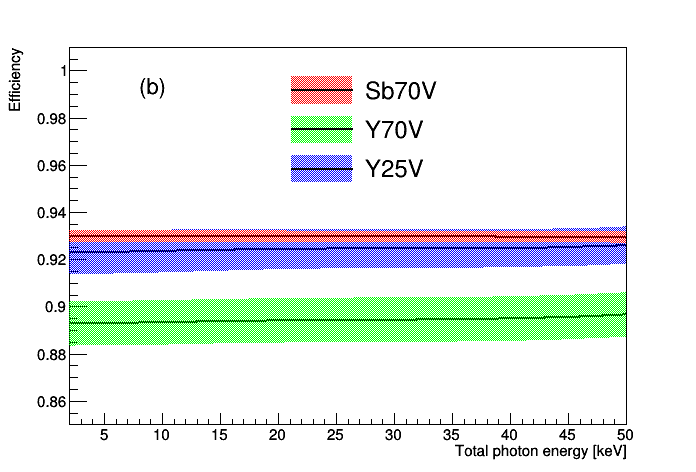

In [40]:
c = rt.TCanvas()
count = 0
legend = rt.TLegend(0.4,0.85,0.9,0.6)
#legend.SetNColumns(3)
legend.SetBorderSize(0)

for i,graph in enumerate(gr_b):
    print ('%d : Graph for %s'%(i,graph.GetName()))
    graph.SetLineColor(line_color[i])
    graph.SetLineWidth(2)
    graph.SetFillColor(fill_color[i])
    graph.SetFillStyle(3001)
    graph.GetYaxis().SetRangeUser(0.85,1.01)
    graph.GetXaxis().SetLimits(2,50.0)
    
#     if(not count):
#         graph.Draw("AL3")
#         g
#         graph.Draw("AL3")
#         count += 1
#     else:
#         graph.Draw("L3 SAME")
        
    l1 = legend.AddEntry(graph,graph.GetName(),"lf")
    l1.SetTextColor(graph.GetMarkerColor())
    
    graph.GetXaxis().SetTitle('Total photon energy [keV]')
    graph.GetYaxis().SetTitle('Efficiency')
    

gr_b[2].Draw('AL3')
gr_b[1].Draw('L3 SAME')
gr_b[0].Draw('L3 SAME')
legend.Draw()
c.Draw()

textOnTop = rt.TLatex()
textOnTop.SetTextSize(0.05);
textOnTop.DrawLatexNDC(0.2,0.8,"#bf{(b)}");

if(save_):
    c.SaveAs('./plots/png/Fig_3b.png')
    c.SaveAs('./plots/pdf/Fig_3b.pdf')
    print ('Plots saved!!')